(2 pts) What is inductive reasoning? Deductive reasoning? Give an example of each, different from the examples given in class.


Inductive reasoning: Inductive reasoning means figuring out general rules from looking at specific examples, helping us guess what might happen next in similar situations.                 
Deductive reasoning: Deductive reasoning is when you use known facts, rules, or principles to figure out specific conclusions or predictions. 

An example of Inductive Reasoning: detecing spam calls/texts                   
An example of deductive reasoning: Approving bank loans

(8 pts) Preprocess your dataset

In [110]:
import pandas as pd
import numpy as np 
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('adult.csv')

In [144]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 
              'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

df = df[(df.astype(str) != ' ?').all(axis=1)]

df['income_new'] = df.apply(lambda row: 1 if '>50K'in row['income'] else 0, axis=1)

df = df.drop(['income','fnlwgt','capital-gain','capital-loss','native-country'], axis=1)

df = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])

/var/folders/68/jgh30zmn54z999vhrzlb3zbc0000gn/T/ipykernel_8883/1498265575.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income_new'] = df.apply(lambda row: 1 if '>50K'in row['income'] else 0, axis=1)


Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

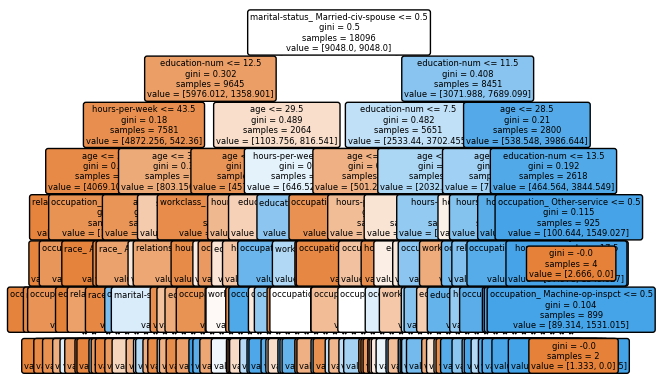

<Figure size 640x480 with 0 Axes>

In [145]:
X = df.drop('income_new', axis=1)
y = df['income_new']


def des_tree(X,y,max_depth=7, random_state=32, test_size=0.4):
    X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.4, random_state=32)
    model = tree.DecisionTreeClassifier(class_weight = 'balanced', max_depth = 7, random_state=42) 
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return model


tree.plot_tree(model, feature_names = list(X.columns),
               filled=True, fontsize=6, rounded=True)
plt.show()
plt.savefig("tree.svg")



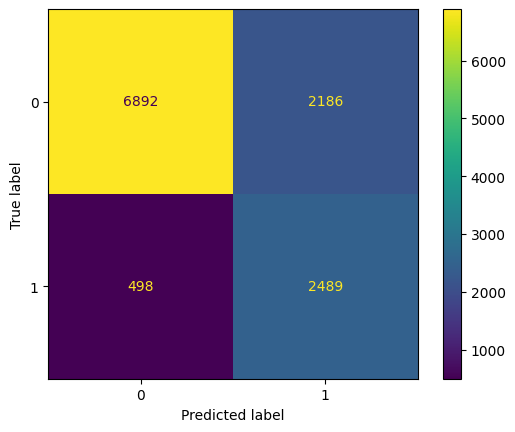

In [108]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [109]:
2489/2987

0.8332775359892869

I saw that my recall was extremely low, and that oversampling my data would not change my numbers, and undersampling would decrease my recall. Therefore, I decided to balance the class (something I got from stackoverflow), which adjusts the weights of the data to increase recall.

Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

/Users/aarushichoudhary/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


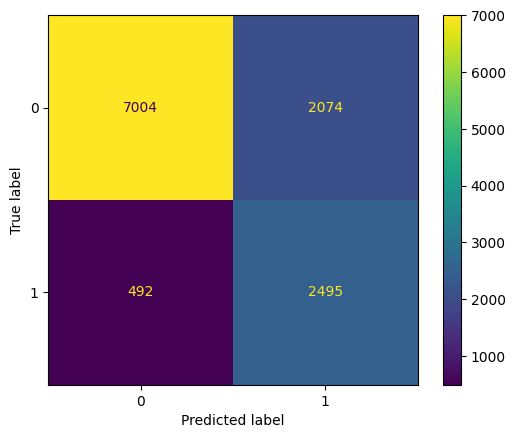

In [112]:
ros = RandomOverSampler(random_state=32)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

modela = LogisticRegression(random_state=32)
modela.fit(X_resampled, y_resampled)


y_pred = modela.predict(X_test)


ConfusionMatrixDisplay.from_estimator(modela, X_test, y_test)

In [128]:

# Random forest is aggregated decision trees
rf = RandomForestClassifier(n_estimators=1000, random_state=30)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.816991297140489

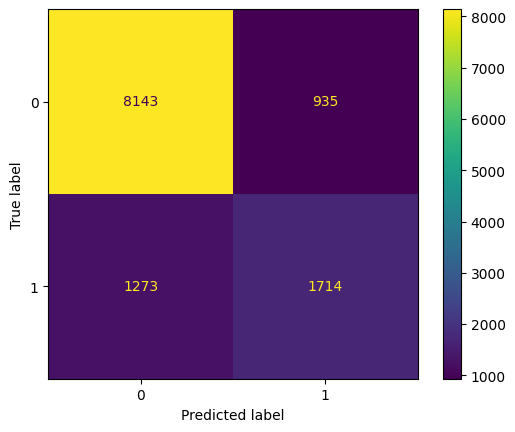

In [129]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

In [127]:
1715/2987

0.5741546702376967

In [98]:
print(rf.feature_importances_, X.columns)

[2.82561497e-01 7.46578917e-02 1.39388844e-01 6.83508371e-03
 8.31191174e-03 1.49955230e-02 8.30365518e-03 1.20427053e-02
 6.68635787e-03 4.05144186e-05 2.25298728e-03 2.44085459e-03
 1.02412122e-03 3.90577765e-04 9.04843504e-04 3.02150931e-03
 1.73695339e-03 3.55687079e-03 3.84275431e-03 1.58522327e-02
 4.73421305e-03 9.54063023e-03 1.14335959e-02 8.31343385e-05
 5.59121016e-03 7.45857115e-03 6.83298001e-03 4.68947866e-04
 7.14932941e-02 1.22949068e-03 2.91930919e-02 2.39271118e-03
 1.94267462e-03 7.94031733e-03 1.24727810e-05 9.52836260e-03
 2.01472105e-02 6.19507264e-03 4.59666154e-03 5.77426024e-03
 1.05459892e-02 2.42986866e-04 2.17239944e-02 4.08014994e-03
 9.38554931e-03 6.07155650e-03 6.79497016e-03 5.77070026e-02
 1.11750557e-02 1.80696543e-03 9.66363280e-03 5.50251884e-03
 1.26730479e-02 2.23869631e-03 4.82915797e-03 7.04096267e-03
 1.55298992e-03 9.58347937e-03 1.09835001e-02 1.09612020e-02] Index(['age', 'education-num', 'hours-per-week', 'workclass_ Federal-gov',
       'w

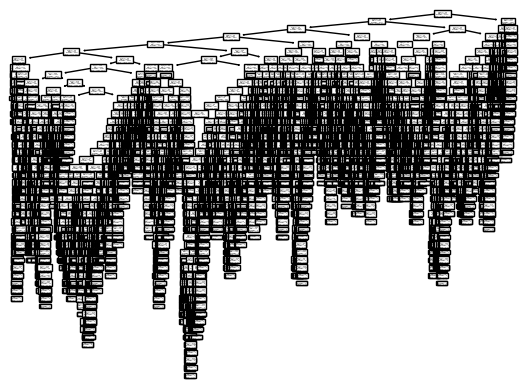

In [99]:
tree_5 = rf.estimators_[4]
tree.plot_tree(tree_5)
plt.savefig("rf_tree.png")

I used oversampling to tune it, which did not do much as we had previously balanced the data from the decision tre

Create an xgboost model tuned to the best of your abilities. Explain how you tuned it.

In [100]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [137]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

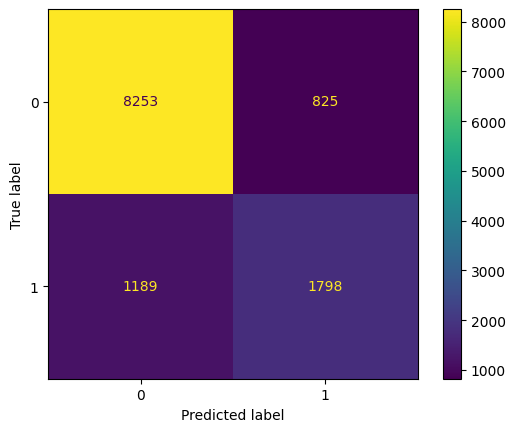

In [136]:
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

In [132]:
1798/2987

0.6019417475728155

Not much could be done to tune it as balancing the data earlier on increased recall. 